Glossaire : 
    
- MatPlotlib : 3D plotting 
- Discret Two dimensional problems using **numpy.meshgrid()**

# Tuto 1 : Bayes decision theory

In this exercise sheet, we will apply Bayes decision theory in the context of small **two-dimensional problems**. For this, we will make use of **3D plotting**. We
introduce below the basics for constructing these plots in Python/Matplotlib.

# The function numpy.meshgrid


To plot two-dimensional functions, we first need to **discretize the two-dimensional input space**. One basic function for this purpose is **numpy.meshgrid** .
The following code creates a discrete grid of the rectangular surface $[0,4] \times [0,3]$. The function numpy.meshgrid takes the discretized intervals
as input, and returns two arrays of size corresponding to the discretized surface (i.e. the grid) and containing the X and Y-coordinates respectively.


In [1]:
import numpy as np
X,Y = np.meshgrid([0,1,2,3,4],[0,1,2,3])
print("This is X \n", X) #Comme l'odre discret des abscisses pour chaque ligne
print("This is Y \n", Y)  #Comme l'ordre discret des ordonnées pour chaque colonne

# Each of the X and Variables are some kind of chess plateau on which the coordinate works  
# as an hyperlane in two dimensions with cooridnates
# First argument gives the format of the lines, the second gives the format of each column

This is X 
 [[0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]]
This is Y 
 [[0 0 0 0 0]
 [1 1 1 1 1]
 [2 2 2 2 2]
 [3 3 3 3 3]]


#numpy.flatten

Note that we can iterate over the elements of the grid by **zipping** the two arrays X and Y containing each coordinate. The function **numpy.flatten**
converts the 2D arrays to one-dimensional arrays, that can then be iterated element-wise.

**zip()**  pour souder les éléments de plusieurs listes ensembles. Dans le cas de X et Y, il suffit de "superposer" les deux images pour comprendre ce qu'il se passe.

In [2]:
print(X.flatten(),"\n",Y.flatten())
print(list(zip(X.flatten(),Y.flatten()))) 
# On a une liste des coordonnées et non une liste de liste comme on aurait eu avec une matrice à la numpy
# Les coordonnées sont données ligne par ligne 

[0 1 2 3 4 0 1 2 3 4 0 1 2 3 4 0 1 2 3 4] 
 [0 0 0 0 0 1 1 1 1 1 2 2 2 2 2 3 3 3 3 3]
[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (0, 2), (1, 2), (2, 2), (3, 2), (4, 2), (0, 3), (1, 3), (2, 3), (3, 3), (4, 3)]


### **3D-Plotting**

In [3]:
import matplotlib
%matplotlib inline 
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

As an example, we would like to plot the L2-norm function $f(x,y) = \sqrt{x^2 + y^2}$ on the subspace $x,y \in [-4,4]$. First, we create a meshgrid with
appropriate size:

In [5]:
R = np.arange(-4,4+1e-9,0.1)   #format : np.arrange(start, stop, step) : On ajoute 1e-9 just so 4.00 is included
X,Y = np.meshgrid(R,R)
print(X.shape,Y.shape) #Both two dimension hyperplane like

(81, 81) (81, 81)


Here, we have used a discretization with small increments of 0.1 in order to produce a plot with better resolution. The resulting meshgrid has size (81x81),
that is, approximately 6400 points. The function $f$ needs to be evaluated at each of these points. This is achieved by applying element-wise operations
on the arrays of the meshgrid. The norm at each point of the grid is therefore computed as:

**There may be issues with p(x) being approximated to 0 with no observations on a specific point, pb wih divisions using Bayes theorem**

In [6]:
F = (X**2+Y**2)**.5 # Euclidean Norm function
print(F.shape)
print(F)

(81, 81)
[[5.65685425 5.58659109 5.51724569 ... 5.51724569 5.58659109 5.65685425]
 [5.58659109 5.51543289 5.44518136 ... 5.44518136 5.51543289 5.58659109]
 [5.51724569 5.44518136 5.37401154 ... 5.37401154 5.44518136 5.51724569]
 ...
 [5.51724569 5.44518136 5.37401154 ... 5.37401154 5.44518136 5.51724569]
 [5.58659109 5.51543289 5.44518136 ... 5.44518136 5.51543289 5.58659109]
 [5.65685425 5.58659109 5.51724569 ... 5.51724569 5.58659109 5.65685425]]


The resulting function values are of same size as the meshgrid. Taking X , Y , F jointly results in a list of approximately 6400 triplets representing the x-,
y-, and z-coordinates in the three-dimensional space where the function should be plotted. The 3d-plot can now be constructed easily by means of the
**function scatter of matplotlib.pyplot .**

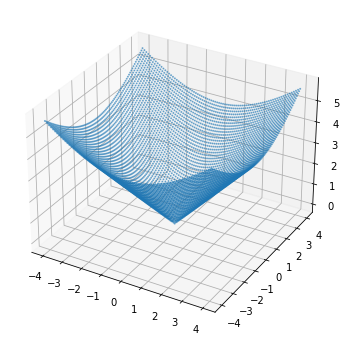

In [7]:
fig = plt.figure(figsize=(10,6))   
ax = plt.axes(projection='3d')   #Voir les différentes projections possibles https://matplotlib.org/stable/api/projections_api.html#module-matplotlib.projections
ax.scatter(X,Y,F,s=1,alpha=0.5)  #plt.scatter(x,y ...) a scattering of point X vs Y, opacity = alpha, color ... s = marker size

The parameter s and alpha control the size and the transparency of each data point. Other 3d plotting variants exist (e.g. surface plots), however, the
scatter plot is the simplest approach at least conceptually. Having introduced how to easily plot 3D functions in Python, we can now analyze twodimensional
probability distributions with this same tool.

# **Gaussian distributions**

Plot of a Gaussian probability distirbution with mean $\mu = (0,0)$, and covariance
matrix $\Sigma = I$ (Standard normal distribution). Discretized dimensions [-4:4].
For two-dimensional input spaces, the standard normal distribution is given by: $$ p(x,y) = \frac{1}{2\pi}e^{-0.5 (x^2+y^2)}. $$ This distribution sums to $1$
when integrated over $\mathbb{R}^2$. However, it does not sum to $1$ when summing over the discretized space (i.e. the grid). Instead, we can work
with a discretized Gaussian-like distribution: $$ P(x,y) = \frac1Z e^{-0.5 (x^2+y^2)} \qquad \text{with} \quad Z = \sum_{x,y} e^{-0.5 (x^2+y^2)} $$ where the
sum runs over the whole discretized space.

* **Compute the distribution $P(x,y)$, and plot it.**
* **Compute the conditional distribution $Q(x,y) = P((x,y) | \sqrt{x^2+y^2} \geq 1)$, and plot it.**
    
    $\Rightarrow$ C'est à dire diviser par la probabilité que la nomre soit sup à 1
* **Marginalize the conditioned distribution $Q(x,y)$ over $y$, and plot the resulting distribution $Q(x)$.** 

$\Rightarrow$ finding the precise distribution of a marginal distribution

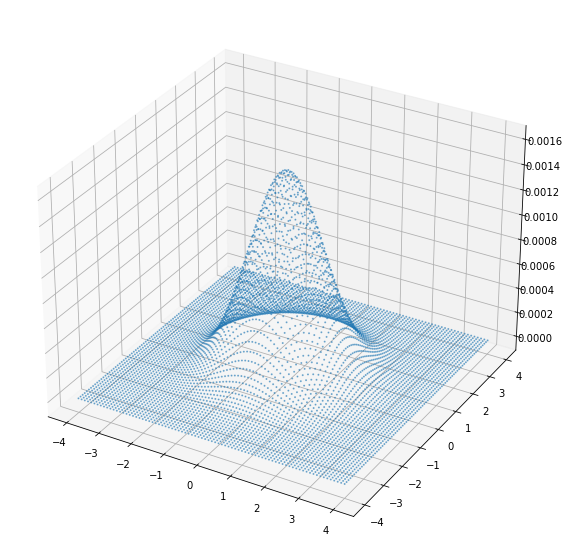

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import math

Z = np.exp(-0.5 * (X**2 + Y**2)).flatten().sum()  #Besoin de flatten avant de faire la sum sinon somme faite sur chaque array (et ici on a une liste d'array ...)

p_cont = (1/(2*np.pi)) * np.exp(-0.5 * (X**2 + Y**2))
p_disc = (1/Z) * np.exp(-0.5 * (X**2 + Y**2))

# Now to plot p_disc : 

fig = plt.figure(figsize=(15,10))   
ax = plt.axes(projection='3d')   
ax.scatter(X,Y,p_disc,s=1,alpha=0.5)

La fonction pow() peut être remplacée par la fonction **np.power(x1, x2, ...)** avec une transformation element wise de chaque x1 a la puissance x2.

### $Q(x,y) = P((x,y) |\sqrt(x^2 + y^2))$ :

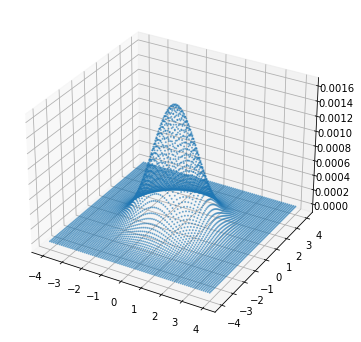

In [9]:
P = np.exp(-0.5*(X**2+Y**2))/(2*np.pi)
P /=P.sum()  # P = P / P.sum() :  Ne change rien ici car on la somme est de 1 sans restriction (definition probabilité)
fig3 = plt.figure(figsize=(10,6)) 
ax = plt.axes(projection='3d') 
ax.scatter(X,Y,P,s=1,alpha=0.5)

1.2 : sous condition que la norme soit >= à 1 (Solution du prof)

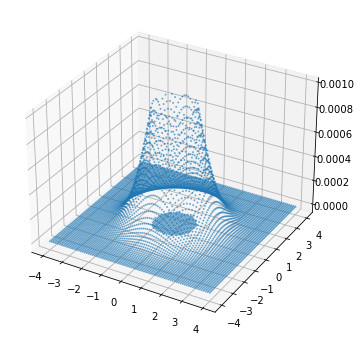

In [10]:
Q = P*(F>=1)
Q /=P.sum()  # Q = Q / P.sum()
fig4 = plt.figure(figsize=(10,6)) 
ax = plt.axes(projection='3d') 
ax.scatter(X,Y,Q,s=1,alpha=0.5)

### 1.3 : Marginalisation de la distribution "over y" : Solution du prof

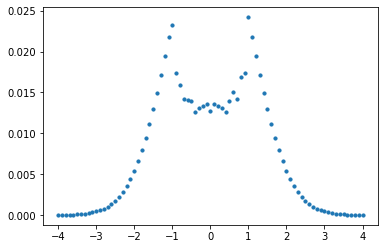

In [11]:
Q.sum(axis=1)  # Summed over Axis 1 axis of Y 
fig = plt.scatter(R,Q.sum(axis=1), s=10, alpha=1.0)

## **Bayesian Classification**


Let the two coordinates x and y be now representated as a two-dimensional vector $\boldsymbol{x}$. We consider two classes $\omega_1$ and
$\omega_2$ with data-generating Gaussian distributions $p(\boldsymbol{x}|\omega_1)$ and $p(\boldsymbol{x}|\omega_2)$ of mean vectors
$$\boldsymbol{\mu}_1 = (-0.5,-0.5) \quad \text{and} \quad \boldsymbol{\mu}_2 = (0.5,0.5)$$ respectively, and same covariance matrix $$\Sigma =
\begin{pmatrix}1.0&0\\0&0.5\end{pmatrix}.$$ Classes occur with probability $P(\omega_1) = 0.9$ and $P(\omega_2) = 0.1$. Analysis tells us that in such
scenario, the optimal decision boundary between the two classes should be linear. We would like to verify this computationally by applying Bayes decision
theory on grid-like discretized distributions.

* **discretize the two data-generating distributions $p(\boldsymbol{x}|\omega_1)$ and
$p(\boldsymbol{x}|\omega_2)$ (i.e. create discrete distributions $P(\boldsymbol{x}|\omega_1)$ and $P(\boldsymbol{x}|\omega_2)$ on the
grid).**
* **From these distributions, compute the total probability distribution $P(\boldsymbol{x}) = \sum_{c \in \{1,2\}} P(\boldsymbol{x} | \omega_c)
\cdot P(\omega_c)$, and plot it.**
* **Compute and plot the class posterior probabilities $P(\omega_1|\boldsymbol{x})$ and $P(\omega_2|\boldsymbol{x})$, and print the Bayes
error rate for the discretized case.**


2.1 : Solution du prof : discretize the two data generating distributions and  plot them with different colors

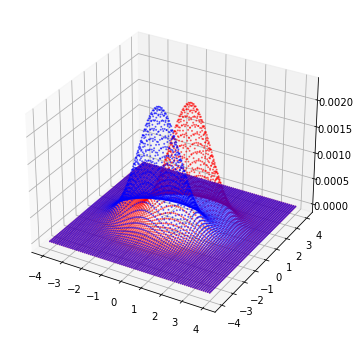

In [12]:
R = np.arange(-4,4+1e-9,0.1)
X1,X2 = np.meshgrid(R, R)
PX1 = np.exp(-0.5*(X1+0.5)**2/1.0-0.5*(X2+0.5)**2/0.5); PX1 = PX1/PX1.sum() 
PX2 = np.exp(-0.5*(X1-0.5)**2/1.0-0.5*(X2-0.5)**2/0.5); PX2 = PX2/PX2.sum() 

fig = plt.figure(figsize=(10,6)) 
ax = plt.axes(projection='3d') 
ax.scatter(X1,X2,PX1,s=1,alpha=0.5, color="blue")
ax.scatter(X1,X2,PX2,s=1,alpha=0.5, color="red")
#ax.scatter(X1,X2,PX,s=1,alpha=0.75, color="green")

### 2.2 : Compute P(X), define the prior

Concernant les notations : 

- $P1 = P(w_1)$
- $PX = \int_w P(X|w) P(w) dw$
- $PX1 = P(X|w_1) * P(w_1)$
- $P1X = P(w_1|X)$

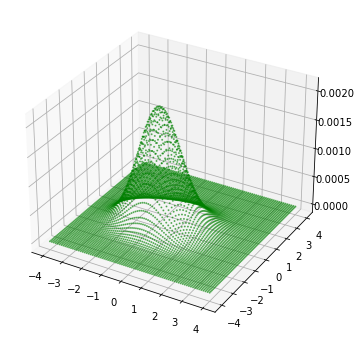

In [14]:
P1 = 0.9
P2 = 0.1

PX = PX1*P1 + PX2*P2   #Discretized btw

fig = plt.figure(figsize=(10,6)) 
ax = plt.axes(projection='3d') 
ax.scatter(X1,X2,PX,s=1,alpha=0.5, color="green")

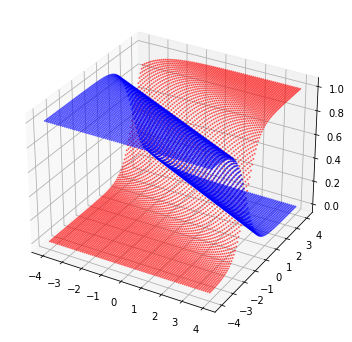

In [15]:
P1X = PX1*P1/PX
P2X = PX2*P2/PX

fig = plt.figure(figsize=(10,6)) 
ax = plt.axes(projection='3d') 
ax.scatter(X1,X2,P1X,s=1,alpha=0.5, color="blue")
ax.scatter(X1,X2,P2X, s=1, alpha=0.5, color="red")

2.3 Compute the Bayes error rates (BER) :

In [ ]:
BER = (np.minimum(P1X,P2X)*PX).sum()
print("Nous avons donc un taux d'erreur maximum de \n", BER)

Nous avons donc un taux d'erreur maximum de 
 0.08042117524744927


## **Exercise 3: Reducing the Variance (5+5 P)**

Suppose that the data generating distribution for the second class changes to produce samples much closer to the mean. This variance reduction for the
second class is implemented by keeping the first covariance the same (i.e. $\Sigma_1 = \Sigma$) and dividing the second covariance matrix by 4 (i.e.
$\Sigma_2 = \Sigma/4$). For this new set of parameters, we can perform the same analysis as in Exercise 2.

* **Plot the new class posterior probabilities $P(\omega_1|\boldsymbol{x})$ and $P(\omega_2|\boldsymbol{x})$ associated to the new
covariance matrices, and print the new Bayes error rate.**


3.1 : New class posterior prbabilities and associated BER : 

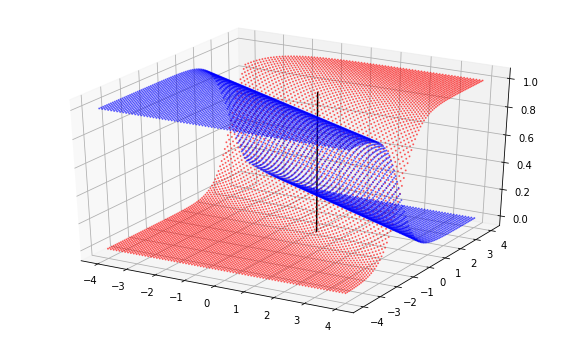

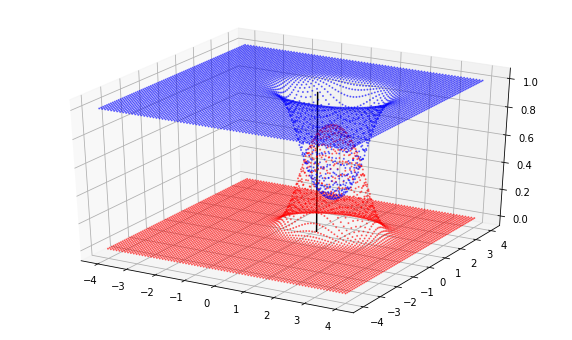

In [ ]:
PX2b = np.exp(-0.5*(X1-0.5)**2/(1.0/4.0)-0.5*(X2-0.5)**2/(0.5/4.0)); PX2b = PX2b/PX2b.sum()

#New distribution of x PXb
PXb = PX1*P1 + PX2b*P2

#New Prior distribution with PXb
P1Xb = PX1*P1/PXb
P2Xb = PX2b*P2/PXb

fig = plt.figure(figsize=(10,6)) 
ax = plt.axes(projection='3d') 
ax.scatter(X1,X2,P1X,s=1,alpha=0.5, color="blue")
ax.scatter(X1,X2,P2X,s=1,alpha=0.5, color="red")
ax.plot([0.5,0.5],[0.5,0.5],[0,1],color="black")

fig = plt.figure(figsize=(10,6)) 
ax = plt.axes(projection='3d') 
ax.scatter(X1,X2,P1Xb,s=1,alpha=0.5, color="blue")
ax.scatter(X1,X2,P2Xb,s=1,alpha=0.5, color="red")
ax.plot([0.5,0.5],[0.5,0.5],[0,1],color="black")

#We observe that the decision function isn't linear anymore

In [ ]:
BERb = (np.minimum(P1Xb,P2Xb)*PXb).sum()
print("Nous avons donc un nouveau taux d'erreur maximum de \n", BERb)

Nous avons donc un nouveau taux d'erreur maximum de 
 0.07290780555695717


C'est normal que nous ayons un taux d'erreur max plus faible. On a réduit la variance d'un des "sensors", donc une meilleur accuracy

Intuition tells us that by variance reduction and resulting concentration of generated data for class 2 in a smaller region of the input space, it should be
easier to predict class 2 with certainty at this location. Paradoxally, in this new "dense" setting, we observe that class 2 does not reach full certainty
anywhere in the input space, whereas it did in the previous exercise.

* **Explain this paradox**


In the previous exercice, in some location, we could be sure 100% that one or the other classe would be chosen. Now we cannot have those moments of certainety, but we also have a more concentrated data, we still can't classify one class with confidence.
It doesnt happens due to the data density being high at the cluster center.
We see on the lines where did the increase happened and how often to we derive away from the decision border. 